In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os,sys
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import argparse
import skimage, skimage.io

import torch
import torchvision

import torchxrayvision as xrv

In [3]:
img = skimage.io.imread('../tests/00027426_000.png')
img = xrv.datasets.normalize(img, 255)  

# Check that images are 2D arrays
if len(img.shape) > 2:
    img = img[:, :, 0]
if len(img.shape) < 2:
    print("error, dimension lower than 2 for image")

# Add color channel
img = img[None, :, :]

In [4]:
transform = torchvision.transforms.Compose([xrv.datasets.XRayCenterCrop(),
                                            xrv.datasets.XRayResizer(224)])

img = transform(img)
img = torch.from_numpy(img).unsqueeze(0)

In [5]:
model = xrv.models.get_model('densenet121-res224-all')
model.pathologies

['Atelectasis',
 'Consolidation',
 'Infiltration',
 'Pneumothorax',
 'Edema',
 'Emphysema',
 'Fibrosis',
 'Effusion',
 'Pneumonia',
 'Pleural_Thickening',
 'Cardiomegaly',
 'Nodule',
 'Mass',
 'Hernia',
 'Lung Lesion',
 'Fracture',
 'Lung Opacity',
 'Enlarged Cardiomediastinum']

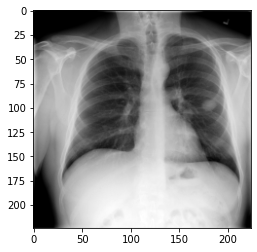

In [6]:
plt.imshow(img[0][0], cmap='gray');

In [7]:
target = model.pathologies.index('Mass')

tensor([0.6060], grad_fn=<SelectBackward0>)


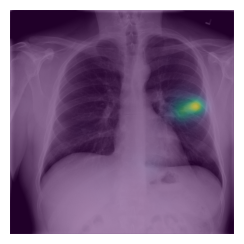

In [8]:
img = img.requires_grad_()

outputs = model(img)
print(outputs[:,target])
grads = torch.autograd.grad(outputs[:,target], img)[0][0][0]
blurred = skimage.filters.gaussian(grads.detach().cpu().numpy()**2, sigma=(5, 5), truncate=3.5)

my_dpi = 100
fig = plt.figure(frameon=False, figsize=(224/my_dpi, 224/my_dpi), dpi=my_dpi)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)
ax.imshow(img[0][0].detach().cpu().numpy(), cmap="gray", aspect='auto')
ax.imshow(blurred, alpha=0.5);